In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df=pd.read_csv('homeprices_banglore.csv')
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [45]:
df[['area','bedrooms']].shape,df['price'].shape
#one is in 2d array and the another one is in 1d array

((20, 2), (20,))

In [46]:
df.shape

(20, 3)

In [47]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(df.drop(['price'],axis=1))
scaled_Y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1)) # transforming 1d to 2d array

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [48]:
scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [49]:
scaled_X.shape,scaled_Y.shape

((20, 2), (20, 1))

In [52]:
scaled_Y=scaled_Y.reshape(20,)  #2d to 1d

In [53]:
scaled_Y.shape

(20,)

### Batch GD

In [87]:
def batch_gd(X,y_true,epochs,learing_rate=0.01):
    
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        y_pred=np.dot(w,X.T)+b
        
        w_grad=(2/total_samples)*(X.T.dot(y_pred-y_true))
        b_grad=(2/total_samples)*np.mean(y_pred-y_true)
        
        w=w-learing_rate*w_grad
        b=b-learing_rate*b_grad
        
        cost=np.mean(np.square(y_pred-y_true))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w, b, cost, cost_list, epoch_list = batch_gd(scaled_X,scaled_Y,1000)
w,b,cost

(array([0.65958587, 0.40733484]), -0.06372206153472902, 0.004711868499359499)

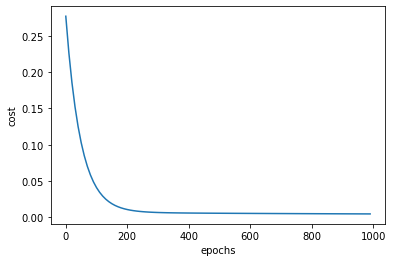

In [88]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [89]:
def predict(area,bedrooms,w,b):
    scaled_X=sx.transform([[area,bedrooms]])[0]
    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

119.90892132049711

In [90]:
predict(1000,2,w,b)

43.28604451267185

In [91]:
predict(1500,3,w,b)

72.38602512455829

### (2) Stochastic Gradient Descent Implementation

In [93]:
import random

In [108]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_Y,10000)
w_sgd, b_sgd, cost_sgd

(array([0.70753979, 0.6738926 ]), -0.23136387219841772, 0.002794071912926359)

In [97]:
w,b

(array([0.65958587, 0.40733484]), -0.06372206153472902)

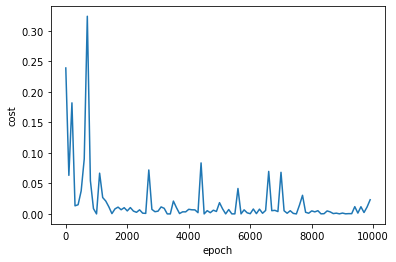

In [109]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)